# Análisis Inicial - Imagen Digital

## Importar Librerias

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

## Leer imagen

In [3]:
img = cv2.imread('Imagenes\k0015.jpg')

In [4]:
img.shape

(720, 960, 3)

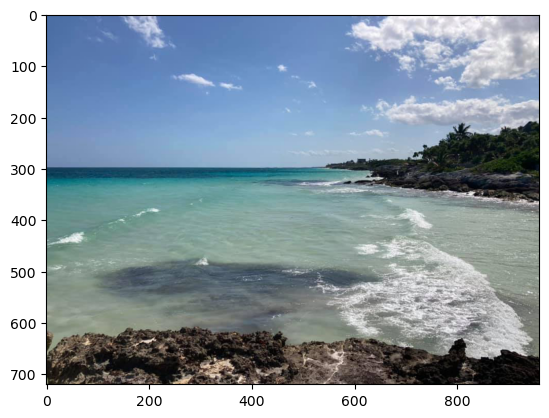

In [5]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Función que genere un histograma considerando todos los canales de la imagen

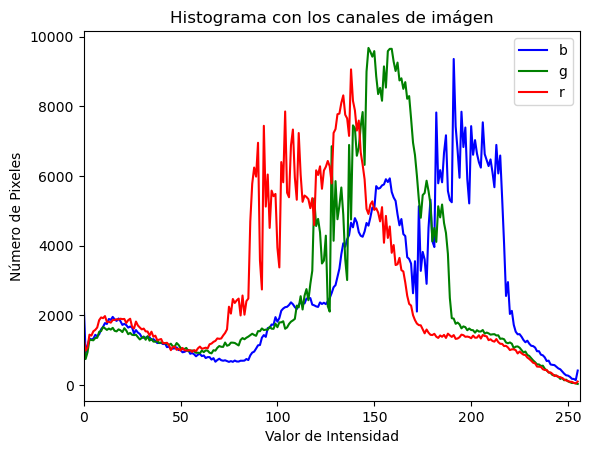

In [6]:
def hist_canals(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color = col, label=col)
        plt.legend()
        plt.xlim([0,256])
        
    plt.xlabel('Valor de Intensidad')
    plt.ylabel('Número de Pixeles')
    plt.title('Histograma con los canales de imágen')
    plt.show()

hist_canals(img)

## Generar una subventana de la imagen 

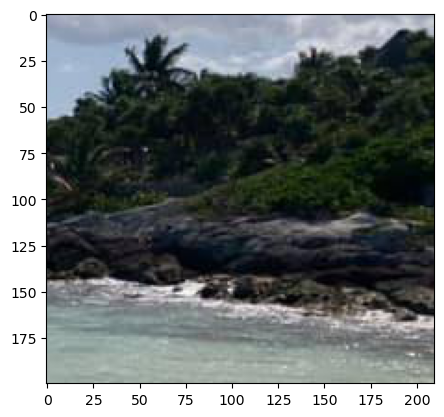

In [7]:
x1, y1 = 750, 200  # Coordenadas de la esquina superior izquierda
x2, y2 = 960, 400  # Coordenadas de la esquina inferior derecha

# Recorta la subventana
area = img[y1:y2, x1:x2]

# Muestra la subventana
subventana = cv2.cvtColor(area, cv2.COLOR_BGR2RGB)
plt.imshow(subventana)
plt.show()


### Conversión de la subventana a escala de grises

(200, 210)


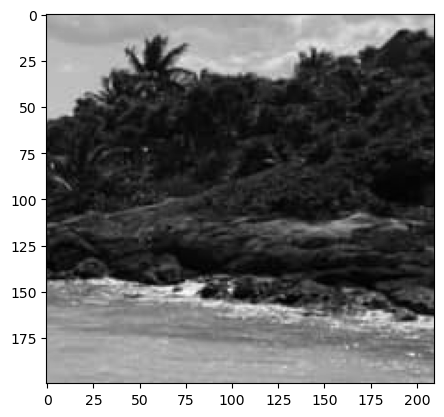

In [13]:
# Fórmula para convertir una imagen en color a escala de grises ponderando los canales RGB
imagen_gris = 0.299 * subventana[:,:,2] + 0.587 * subventana[:,:,1] + 0.114 * subventana[:,:,0]

# Se muestra la forma (dimensiones) de la imagen en escala de grises
print(imagen_gris.shape)

plt.imshow(imagen_gris, cmap ='gray')
plt.show()

### Histograma de la subventana recortada en escala de grises 

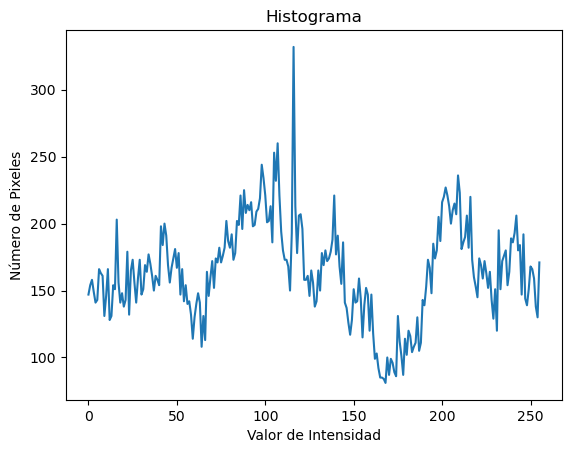

In [14]:
def hist_plot(img):
     
    height, width = img.shape
    # Lista para almacenar la frecuencia de valores de cada intensidad de color
    count =[]
     
    # Lista para todos los posibles valores de intensidad
    r = []
    
    # Itera a través de los valores de intensidad posibles (0-255)
    for k in range(0, 256):
        r.append(k)
        count1 = 0
         
        # Recorre cada píxel de la imagen para contar cuántos píxeles tienen la intensidad 'k'
        for i in range(height):
            for j in range(width):
                if img[i, j]== k:
                    count1+= 1
        count.append(count1)
         
    return (r, count)

# Escalamos la imagen multiplicando por 255 y convirtiéndola a tipo uint8
img_stretch = (imagen_gris * 255).astype(np.uint8)
img_stretch.shape

r, count = hist_plot(img_stretch)

#plotting the histograma
plt.plot(r, count)
plt.xlabel('Valor de Intensidad')
plt.ylabel('Número de Pixeles')
plt.title('Histograma')
plt.show()

### De forma aleatorio considerar 5 filas y graficar los valores de intensidad para analizar las transiciones

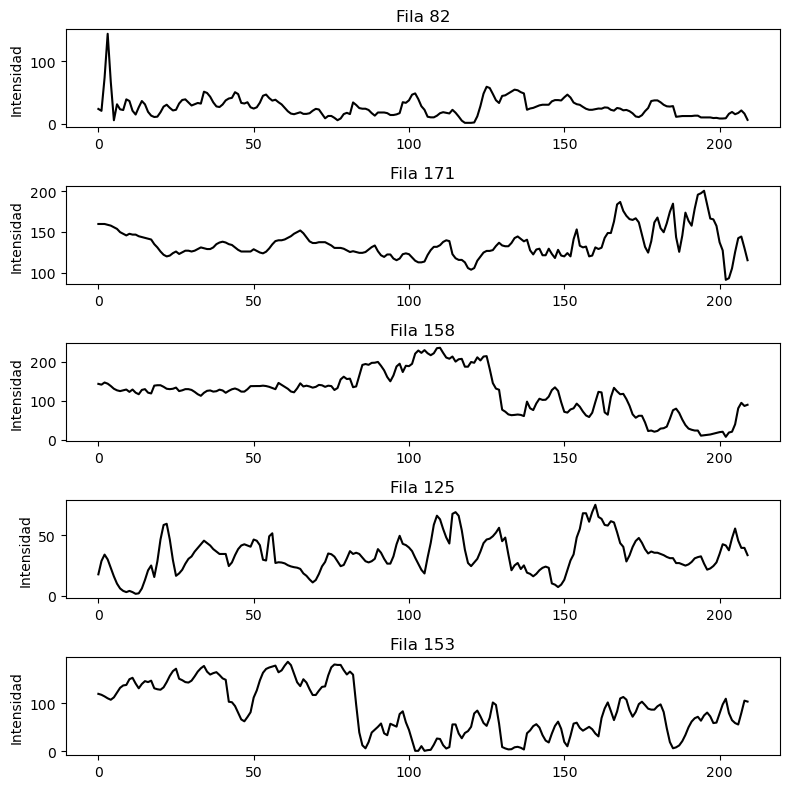

In [27]:
# Determinar el tamaño de la figura
plt.figure(figsize=(8, 8))

# Obtener el tamaño de
alto, ancho = imagen_gris.shape

# Seleccionar aleatoriamente 5 filas
filas = random.sample(range(alto), 5)

# Graficar los valores de intensidad de las filas seleccionadas
for i, fila in enumerate(filas, 1):
    intensidad = imagen_gris[fila, :]
    # Agregar la línea correspondiente a cada fila en el gráfico
    plt.subplot(5, 1, i)
    # Dibujar la linea con su etiqueta correspondiente
    plt.plot(intensidad, color='black')
    plt.title(f'Fila {fila}')
    plt.ylabel('Intensidad')

plt.tight_layout()
plt.show()